#### Supplement Figure 1

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


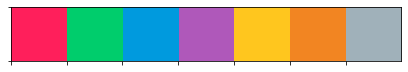

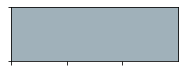

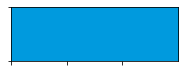

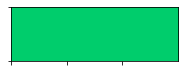

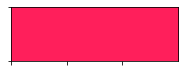

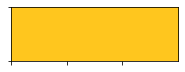

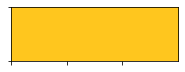

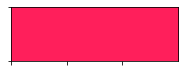

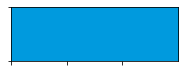

In [1]:
%matplotlib inline
%run settings_load.py

##### artificial *in silico* data
used division rates:
- for n=2: l=0.2 (theta in figure)
- for n=15: l=0.255 (theta in figure)

In [2]:
def make_net(n):
    net = me.Network(f'net_div_n{n}')
    net.structure([{'start': 'X_t', 'end': 'X_t',
                'rate_symbol': 'l',
                'type': 'S -> S + S', 'reaction_steps': n}])
    return net

### general settings
num_iter = 500
variables = {'X_t': ('X_t', )}
initial_values = {'X_t': 1}
time_values = np.linspace(0.0, 10.0, num=10000, endpoint=True)

### n=2 data
net = make_net(2)
theta_values = {'l': 0.2}

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1])

sims_n2 = np.array(res_list)


### n=15 data
net = make_net(15)
theta_values = {'l': 0.255}

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1])

sims_n15 = np.array(res_list)


In [3]:
# for the data we only take first and last time points
time_values_data = time_values[[0, -1]]
sims = sims_n2[:, :, (0, -1)]
data_n2 = me.Data('data_division_process_n2')
data_n2.load(['X_t',], time_values_data, sims, bootstrap_samples=10000, basic_sigma=1/num_iter)

sims = sims_n15[:, :, (0, -1)]
data_n15 = me.Data('data_division_process_n15')
data_n15.load(['X_t',], time_values_data, sims, bootstrap_samples=10000, basic_sigma=1/num_iter)

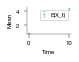

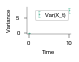

In [4]:
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})

settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': cactiv},
}
me.plots.data_mean_plot(data_n2)

settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': cactiv},
}
me.plots.data_variance_plot(data_n2)

/Users/mlanghinrichs/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/mlanghinrichs/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


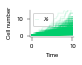

In [5]:
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

sims = sims_n2
plt.plot(time_values, sims[0, 0, :], color=cactiv, linewidth=1.0, zorder=1000, label='$X_t$', alpha=0.1) # color='darkgreen'
for trace_i in range(sims.shape[0]-1):
        plt.plot(time_values, sims[trace_i+1, 0, :], color=cactiv, linewidth=1.0, zorder=1000, alpha=0.1) # color='darkgreen'

# ax.set_yticklabels([])
# ax.set_xticklabels([])
# ax.tick_params(axis=u'both', which=u'both',length=0)

# ax.set_ylim([-0.3, None])
# leg = plt.legend()
# plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')
plt.xlabel('Time')
plt.ylabel('Cell number')
plt.ylim(-0.2, 15)
plt.legend()
#plt.ylabel('#Cells')
plt.savefig(f'paper_figures/div_process_data_counts_n2.pdf', bbox_inches='tight')

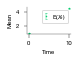

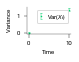

In [14]:
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})

settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': cactiv},
}
me.plots.data_mean_plot(data_n15, settings=settings)

settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': cactiv},
}
me.plots.data_variance_plot(data_n15, settings=settings)

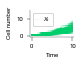

In [7]:
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

sims = sims_n15
plt.plot(time_values, sims[0, 0, :], color=cactiv, linewidth=1.0, zorder=1000, label='$X_t$', alpha=0.1) # color='darkgreen'
for trace_i in range(sims.shape[0]-1):
        plt.plot(time_values, sims[trace_i+1, 0, :], color=cactiv, linewidth=1.0, zorder=1000, alpha=0.1) # color='darkgreen'

# ax.set_yticklabels([])
# ax.set_xticklabels([])
# ax.tick_params(axis=u'both', which=u'both',length=0)

# ax.set_ylim([-0.3, None])
# leg = plt.legend()
# plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')
plt.xlabel('Time')
plt.ylabel('Cell number')
plt.ylim(-0.2, 15)
plt.legend()
#plt.ylabel('#Cells')
plt.savefig(f'paper_figures/div_process_data_counts_n15.pdf', bbox_inches='tight')

In [20]:
# save data objects (to have some fixed, reproducible objects)
# with open('division_process_files/data_division_process_2steps_500repeats_2times.pickle', 'wb') as file_:
#     pickle.dump(data_n2, file_)

# with open('division_process_files/data_division_process_15steps_500repeats_2times.pickle', 'wb') as file_:
#     pickle.dump(data_n15, file_)

##### inference

In [3]:
# load fixed data objects
data_n2 = pickle.load(open('division_process_files/data_division_process_2steps_500repeats_2times.pickle', 'rb'))
data_n15 = pickle.load(open('division_process_files/data_division_process_15steps_500repeats_2times.pickle', 'rb'))


In [4]:
# short run n=2: range(1, 4)
# short run n=15: range(14, 17)
nets = [make_net(n) for n in range(1, 21)] # 21
variables = [{'X_t': ('X_t', )}]*len(nets)
initial_values = [{'X_t': 1.0}]*len(nets)
theta_bounds = [{'l': (0.0, 0.5)}]*len(nets)

In [5]:
### run selection (sequentially)
sel_n2 = me.selection.select_models(nets, variables, initial_values,
                                    theta_bounds, data_n2, parallel=False)

/Users/mlanghinrichs/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/mlanghinrichs/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/mlanghinrichs/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [6]:
# # save selection result
# with open('division_process_files/estimation_division_process_2steps_500repeats_2times.pickle', 'wb') as file_:
#     pickle.dump(sel_n2, file_)

In [7]:
# load sel_n2 selection result
sel_n2 = pickle.load(open('division_process_files/estimation_division_process_2steps_500repeats_2times.pickle', 'rb'))

In [8]:
me.selection.compute_model_probabilities(sel_n2)
# array([2.71592205e-08, 9.25288271e-01, 7.47117019e-02])

array([2.94199801e-08, 9.23815018e-01, 7.50532880e-02, 1.09903738e-03,
       3.09787101e-05, 1.46467546e-06, 1.49757798e-07, 2.69976213e-08,
       5.40393704e-09, 1.38216894e-09, 4.22536857e-10, 1.63676241e-10,
       7.86183219e-11, 4.15185014e-11, 2.12642350e-11, 9.58504100e-12,
       7.47489169e-12, 4.60046981e-12, 2.86128932e-12, 2.05360491e-12])

net_div_n2


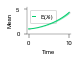

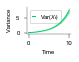

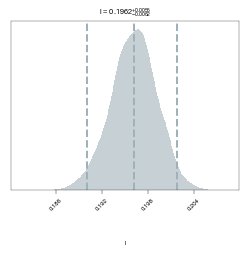

In [24]:
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
est = sel_n2[1]
print(est.net.net_name)
settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': cactiv},
}
me.plots.est_bestfit_mean_plot(est, y_lim=(0, 5.5), settings=settings, save='paper_figures/div_process_best_true_model_n2_mean.pdf')
settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': cactiv},
}
me.plots.est_bestfit_variance_plot(est, settings=settings, save='paper_figures/div_process_best_true_model_n2_var.pdf')
me.plots.est_corner_kernel_plot(est, save='paper_figures/div_process_best_true_model_n2_theta.pdf')

In [12]:
### run selection (sequentially)
sel_n15 = me.selection.select_models(nets, variables, initial_values,
                                    theta_bounds, data_n15, parallel=False)

/Users/mlanghinrichs/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/mlanghinrichs/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/mlanghinrichs/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [13]:
# # save selection result
# with open('division_process_files/estimation_division_process_15steps_500repeats_2times.pickle', 'wb') as file_:
#     pickle.dump(sel_n15, file_)

In [14]:
# load sel_n15 selection result
sel_n15 = pickle.load(open('division_process_files/estimation_division_process_15steps_500repeats_2times.pickle', 'rb'))

In [15]:
me.selection.compute_model_probabilities(sel_n15)
# array([0.37633899, 0.38744786, 0.23621315])

array([0.00000000e+000, 2.03965824e-251, 6.16694347e-149, 5.59008544e-091,
       1.02411627e-056, 1.03757229e-035, 1.49598932e-022, 3.91734036e-014,
       9.65891431e-009, 1.84675343e-005, 2.53012086e-003, 3.67539720e-002,
       1.30029552e-001, 2.61993739e-001, 2.65612048e-001, 1.59376125e-001,
       7.84489239e-002, 4.00190779e-002, 1.79014707e-002, 7.31649273e-003])

net_div_n15


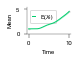

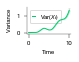

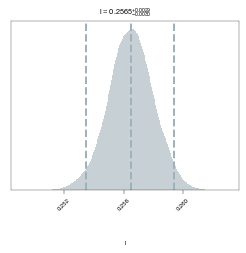

In [23]:
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
est = sel_n15[14]
print(est.net.net_name)
settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': cactiv},
}
me.plots.est_bestfit_mean_plot(est, y_lim=(0, 5.5), settings=settings, save='paper_figures/div_process_best_true_model_n15_mean.pdf')
settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': cactiv},
}
me.plots.est_bestfit_variance_plot(est, settings=settings, save='paper_figures/div_process_best_true_model_n15_var.pdf')
me.plots.est_corner_kernel_plot(est, save='paper_figures/div_process_best_true_model_n15_theta.pdf')

0.9999999999999998


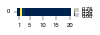

In [19]:
# posterior probability heatmaps
# steps
model_probs = me.selection.compute_model_probabilities(sel_n2)
steps = np.array(range(1, len(model_probs)+1))
print(np.sum(model_probs))
plt.figure(figsize=(1.2,0.15))
df = pd.DataFrame(np.array([model_probs]), columns=steps) # , index=rows
sns.heatmap(df, cmap='cividis', annot=False, fmt='.0f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks([0.5, 4.5, 9.5, 14.5, 19.5], [1, 5, 10, 15, 20])
plt.xticks(rotation=0)
plt.savefig('paper_figures/div_process_steps_n2.pdf', bbox_inches='tight')

1.0


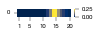

In [20]:
# posterior probability heatmaps
# steps
model_probs = me.selection.compute_model_probabilities(sel_n15)
steps = np.array(range(1, len(model_probs)+1))
print(np.sum(model_probs))
plt.figure(figsize=(1.2,0.15))
df = pd.DataFrame(np.array([model_probs]), columns=steps) # , index=rows
sns.heatmap(df, cmap='cividis', annot=False, fmt='.0f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks([0.5, 4.5, 9.5, 14.5, 19.5], [1, 5, 10, 15, 20])
plt.xticks(rotation=0)
plt.savefig('paper_figures/div_process_steps_n15.pdf', bbox_inches='tight')